In [1]:
import numpy as np
import timeit
import torch

from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image
from main import MeasurementControlEnvironment

Toy Measurement Control Initialized
Using device: cuda
Model loaded
Starting car state: [30.         20.         10.          0.78539816  0.          0.        ]


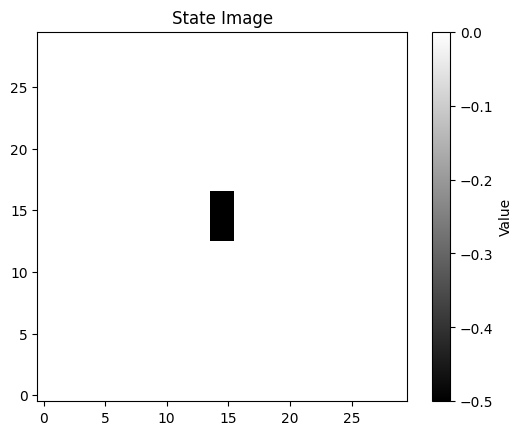

Starting MCTS search...
Finished in 22.001306900998316 seconds
Making tree visualization, this takes a while for a large tree...
Getting best action trajectory...
Actions in best trajectory: [array([0.5, 0. ]), array([0., 0.]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([ 0.5 , -0.25]), array([ 0.5 , -0.25]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([-0.5, -1. ]), array([ 0.5 , -0.25]), array([ 0.5 , -0.25]), array([ 0.5 , -0.25])]


In [3]:
# Create the environment and RL wrapper
env = MeasurementControlEnvironment(notebook=True, no_flask_server=True)
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

# Get starting state
state = env.get_state()
print(f'Starting car state: {state[0]}')
rl.plot_state_image(state)

print('Starting MCTS search...')
start_time = timeit.default_timer()
best_action_idx, root = mcts_search(env, rl, state, 10000)
print(f'Finished in {timeit.default_timer() - start_time} seconds')

# Create the tree visualization
print('Making tree visualization, this takes a while for a large tree...')
render_pyvis(root, env.all_actions, show_unsimulated=False)

# Get the action trajectory
print('Getting best action trajectory...')
actions = get_best_action_trajectory(root, highest_Q=False)
print(f'Actions in best trajectory: {actions}')

env.draw_action_set(env.get_state(), actions)